In [98]:
def GetSNR(Istar, Ic, Ias, Iqs, tau_as, tau_qs, deltat, Cp, RN, Isky, Idc, texp):
    signal = Istar * deltat * Cp
    photon_noise = Ic + Ias + Iqs
    atm_speckles = Istar * ( tau_as * (Ias**2 + 2*(Ic*Ias + Ias*Iqs)) )
    qs_speckles = Istar * ( tau_qs * (Iqs**2 + 2*Ic*Iqs) )
    sigma_sq_h = Istar * deltat * (photon_noise + atm_speckles + qs_speckles + Cp)
    skyanddetector = Isky*deltat + Idc*deltat + (RN * deltat/texp)**2
    noise = np.sqrt(sigma_sq_h + skyanddector)
    return signal / noise


def TimeToSNRSpeckleLimited(SNR, Cp, Ias, tau_as):
    return (SNR * Ias / Cp)**2 * tau_as



<IPython.core.display.Javascript object>


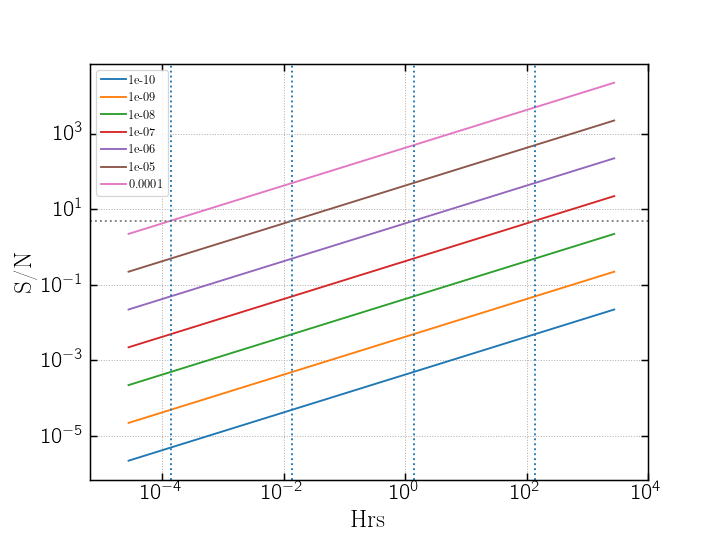

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_22843/1040302621.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(-0.5,10000)


In [71]:
Istar = 1e8 # roughly 8th mag star on 10-m telescope in IR, from Males+2021
Ic = 1e-20
Ias = 1e-4 # see Males and Guyon 2018
Iqs = 1e-20
tau_as = 0.02 # sec, from Fig 10 in Males+ 2021
tau_qs = 0.05 # I don't know a value

Cp = [10**(i) for i in np.arange(-10,-3,1,dtype=float)]


time_to_snr = TimeToSNRSpeckleLimited(5, np.array(Cp), Ias, tau_as)

%matplotlib notebook
deltat = np.linspace(0.1,1e7,300)
for C in Cp:
    snr = []
    for t in deltat:
        snr.append(GetSNR(Istar, Ic, Ias, Iqs, tau_as, tau_qs, t, C))
    plt.plot(deltat*u.s.to(u.hr),snr, label=str(C))
plt.axhline(y=5, ls=':', color='grey')
for t in time_to_snr:
    plt.axvline(x=t*u.s.to(u.hr),ls=':')

plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlim(-0.5,10000)
plt.xlabel('Hrs')
plt.ylabel('S/N')
plt.legend()
plt.grid(ls=':')

<IPython.core.display.Javascript object>


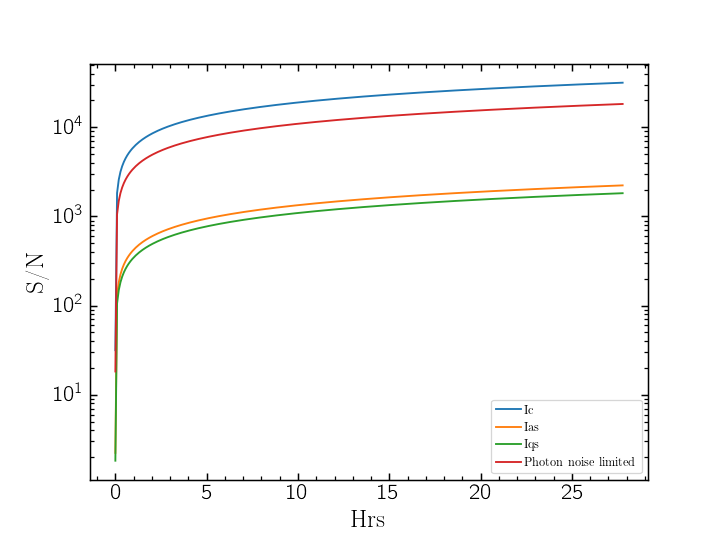

In [79]:


%matplotlib notebook
deltat = np.linspace(0.1,1e5,300)
Istar = 1e8
Ic = 1e-4
Ias = 1e-20
Iqs = 1e-20
tau_as = 0.02 # sec, from Fig 10 in Males+ 2021
tau_qs = 0.05 # I don't know a value
Cp = 10**(-4)
snr = []
for t in deltat:
    snr.append(GetSNR(Istar, Ic, Ias, Iqs, tau_as, tau_qs, t, Cp))
plt.plot(deltat*u.s.to(u.hr),snr, label='Ic')

Istar = 1e8
Ic = 1e-20
Ias = 1e-4
Iqs = 1e-20
tau_as = 0.02 # sec, from Fig 10 in Males+ 2021
tau_qs = 0.05 # I don't know a value
Cp = 10**(-4)
snr = []
for t in deltat:
    snr.append(GetSNR(Istar, Ic, Ias, Iqs, tau_as, tau_qs, t, Cp))
plt.plot(deltat*u.s.to(u.hr),snr, label='Ias')

Istar = 1e8
Ic = 1e-20
Ias = 1e-20
Iqs = 1e-4
tau_as = 0.02 # sec, from Fig 10 in Males+ 2021
tau_qs = 0.03 # I don't know a value
Cp = 10**(-4)
snr = []
for t in deltat:
    snr.append(GetSNR(Istar, Ic, Ias, Iqs, tau_as, tau_qs, t, Cp))
plt.plot(deltat*u.s.to(u.hr),snr, label='Iqs')

Istar = 1e8
Ic = 1e-4
Ias = 1e-4
Iqs = 1e-4
tau_as = 0 # sec, from Fig 10 in Males+ 2021
tau_qs = 0 # I don't know a value
Cp = 10**(-4)
snr = []
for t in deltat:
    snr.append(GetSNR(Istar, Ic, Ias, Iqs, tau_as, tau_qs, t, Cp))
plt.plot(deltat*u.s.to(u.hr),snr, label='Photon noise limited')

plt.xlabel('Hrs')
plt.ylabel('S/N')
plt.gca().set_yscale('log')
plt.legend()

From Males+2021 Eqn 9/10:
"We see that under such conditions I∗Iasτas >> 1, which would hold even for significantly smaller τas"

This shows that $I_* I_{as} \tau_{as}$ = 1 at $\tau_{as} =$ 1e-4

so for $\tau_{as} \gtrsim$ 1e-4 s, we are atm speckle limited regime

9.999999999999999e-05


<IPython.core.display.Javascript object>


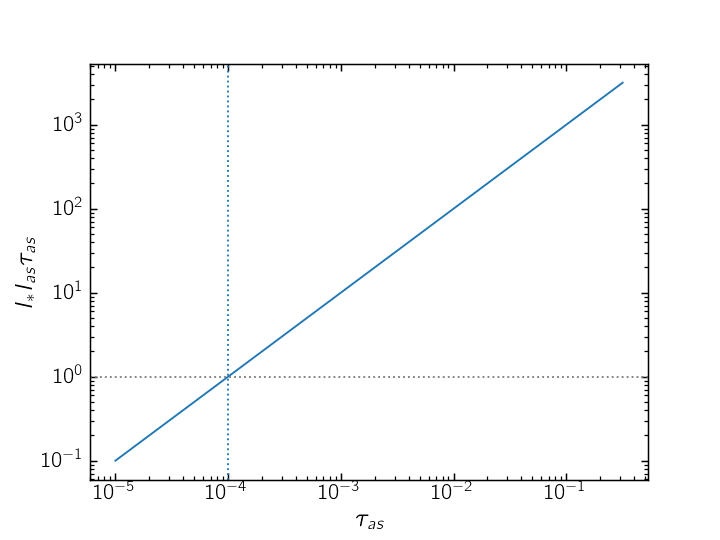

Text(0, 0.5, '$I_* I_{as} \\tau_{as}$')

In [97]:
Istar = 1e8
Ic = 1e-20
Ias = 1e-4
Iqs = 1e-20
tau_as = 0.02 # sec, from Fig 10 in Males+ 2021
tau_qs = 0.05 # I don't know a value
Cp = 10**(-4)

tau_as_array = np.logspace(-0.5,-5,20)

from scipy.interpolate import interp1d
spl = interp1d(Istar*Ias*tau_as_array,tau_as_array)
print(spl(1))

%matplotlib notebook
plt.plot(tau_as_array,Istar*Ias*tau_as_array)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.axhline(y=1,ls=':',color='grey')
plt.axvline(x=spl(1),ls=':')
plt.xlabel(r'$\tau_{as}$')
plt.ylabel(r'$I_* I_{as} \tau_{as}$')